Machine Learning Model for datection of the DDOS (Distributed Denial of Service) attack.

Importing the libraries

In [25]:
import pandas as pd
import numpy as np

#Libraries for visualization
import seaborn as sns
import matplotlib.pyplot as plt
import csv

#preprocessing libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

# Machine Learning algos
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC 
from sklearn.neural_network import MLPClassifier

# Performace analysis
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score,roc_auc_score,roc_curve,auc,confusion_matrix
from sklearn.preprocessing import label_binarize
from itertools import cycle

# warning ignore
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('DDos.csv')

### Data Cleaning and Preprocessing

In [3]:
df.head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,54865,3,2,0,12,0,6,6,6.0,0.0,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
1,55054,109,1,1,6,6,6,6,6.0,0.0,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
2,55055,52,1,1,6,6,6,6,6.0,0.0,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
3,46236,34,1,1,6,6,6,6,6.0,0.0,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
4,54863,3,2,0,12,0,6,6,6.0,0.0,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN


In [4]:
df.shape

(66237, 79)

In [5]:
# Column names
df.columns

Index([' Destination Port', ' Flow Duration', ' Total Fwd Packets',
       ' Total Backward Packets', 'Total Length of Fwd Packets',
       ' Total Length of Bwd Packets', ' Fwd Packet Length Max',
       ' Fwd Packet Length Min', ' Fwd Packet Length Mean',
       ' Fwd Packet Length Std', 'Bwd Packet Length Max',
       ' Bwd Packet Length Min', ' Bwd Packet Length Mean',
       ' Bwd Packet Length Std', 'Flow Bytes/s', ' Flow Packets/s',
       ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max', ' Flow IAT Min',
       'Fwd IAT Total', ' Fwd IAT Mean', ' Fwd IAT Std', ' Fwd IAT Max',
       ' Fwd IAT Min', 'Bwd IAT Total', ' Bwd IAT Mean', ' Bwd IAT Std',
       ' Bwd IAT Max', ' Bwd IAT Min', 'Fwd PSH Flags', ' Bwd PSH Flags',
       ' Fwd URG Flags', ' Bwd URG Flags', ' Fwd Header Length',
       ' Bwd Header Length', 'Fwd Packets/s', ' Bwd Packets/s',
       ' Min Packet Length', ' Max Packet Length', ' Packet Length Mean',
       ' Packet Length Std', ' Packet Length Variance', '

In [6]:
# Removing leading and trailing spaces in the column name
df.columns= df.columns.str.strip()

In [7]:
df.columns # After stripping the spaces

Index(['Destination Port', 'Flow Duration', 'Total Fwd Packets',
       'Total Backward Packets', 'Total Length of Fwd Packets',
       'Total Length of Bwd Packets', 'Fwd Packet Length Max',
       'Fwd Packet Length Min', 'Fwd Packet Length Mean',
       'Fwd Packet Length Std', 'Bwd Packet Length Max',
       'Bwd Packet Length Min', 'Bwd Packet Length Mean',
       'Bwd Packet Length Std', 'Flow Bytes/s', 'Flow Packets/s',
       'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min',
       'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max',
       'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean', 'Bwd IAT Std',
       'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags',
       'Fwd URG Flags', 'Bwd URG Flags', 'Fwd Header Length',
       'Bwd Header Length', 'Fwd Packets/s', 'Bwd Packets/s',
       'Min Packet Length', 'Max Packet Length', 'Packet Length Mean',
       'Packet Length Std', 'Packet Length Variance', 'FIN Flag Count',
       'SYN Flag Co

In [8]:
df['Label'].unique()

array(['BENIGN', 'DDoS', nan], dtype=object)

Text(0, 0.5, 'Null Value Count')

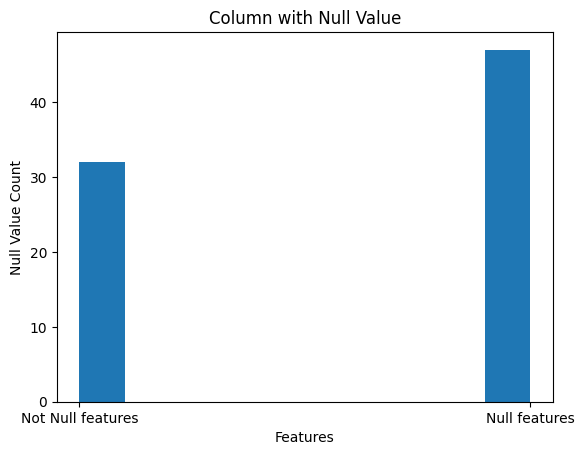

In [9]:
plt.figure()
plt.hist(df.isna().sum())

plt.xticks([0,1],labels=['Not Null features','Null features']) #replacing the 0 and 1 with the not null and null label
plt.title('Column with Null Value')
plt.xlabel("Features")
plt.ylabel("Null Value Count")

In [10]:
# Counting the null for null containing columns
for feature in df.columns:
    null_count=df[feature].isnull().sum()
    if null_count>0:
        print(feature," : ",null_count)

Fwd URG Flags  :  1
Bwd URG Flags  :  1
Fwd Header Length  :  1
Bwd Header Length  :  1
Fwd Packets/s  :  1
Bwd Packets/s  :  1
Min Packet Length  :  1
Max Packet Length  :  1
Packet Length Mean  :  1
Packet Length Std  :  1
Packet Length Variance  :  1
FIN Flag Count  :  1
SYN Flag Count  :  1
RST Flag Count  :  1
PSH Flag Count  :  1
ACK Flag Count  :  1
URG Flag Count  :  1
CWE Flag Count  :  1
ECE Flag Count  :  1
Down/Up Ratio  :  1
Average Packet Size  :  1
Avg Fwd Segment Size  :  1
Avg Bwd Segment Size  :  1
Fwd Header Length.1  :  1
Fwd Avg Bytes/Bulk  :  1
Fwd Avg Packets/Bulk  :  1
Fwd Avg Bulk Rate  :  1
Bwd Avg Bytes/Bulk  :  1
Bwd Avg Packets/Bulk  :  1
Bwd Avg Bulk Rate  :  1
Subflow Fwd Packets  :  1
Subflow Fwd Bytes  :  1
Subflow Bwd Packets  :  1
Subflow Bwd Bytes  :  1
Init_Win_bytes_forward  :  1
Init_Win_bytes_backward  :  1
act_data_pkt_fwd  :  1
min_seg_size_forward  :  1
Active Mean  :  1
Active Std  :  1
Active Max  :  1
Active Min  :  1
Idle Mean  :  1
Idle S

Text(0, 0.5, 'Missing count')

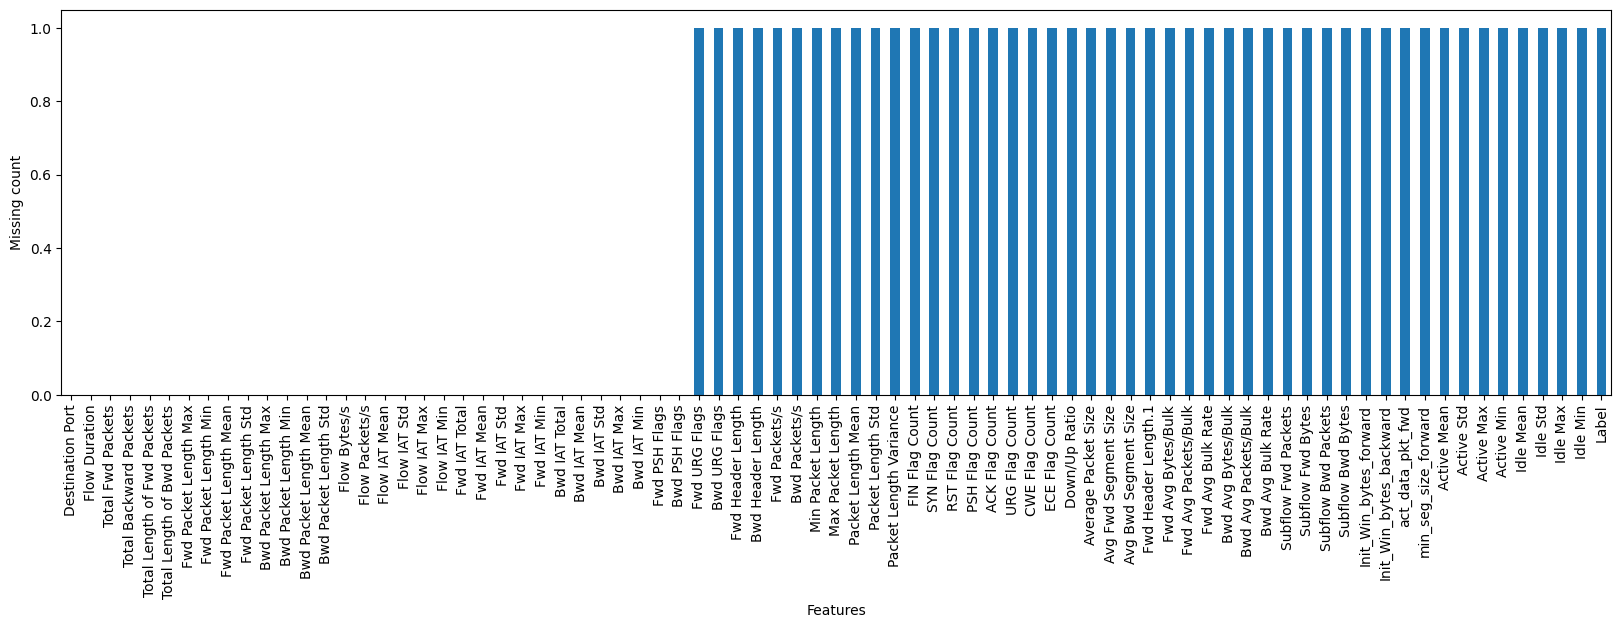

In [11]:
# counting for each colummn- histogram

null_value=df.isnull().sum()
fig=plt.figure(figsize=(20,5))
null_value.plot(kind='bar')
plt.xlabel('Features')
plt.ylabel('Missing count')


In [12]:
# Droping the null value tupple
df_copy=df.dropna()

print('Before Droping: ',df.shape)
print('After Droping: ',df_copy.shape)

Before Droping:  (66237, 79)
After Droping:  (66236, 79)


([<matplotlib.axis.XTick at 0x1686045a470>,
 [Text(0, 0, 'Not Null=0'), Text(1, 0, 'Null=1')])

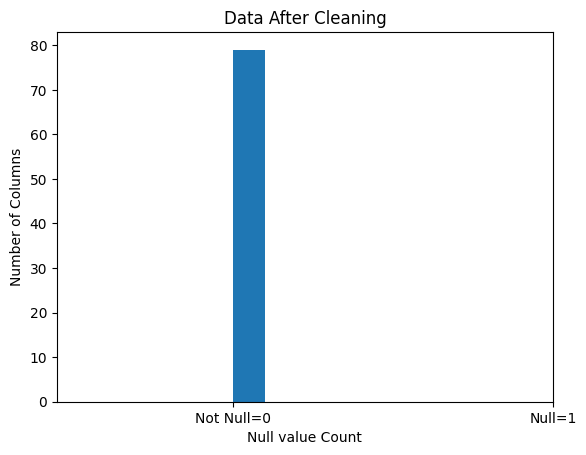

In [13]:
# Null value visualizationn after cleaning

plt.figure()
plt.hist(df_copy.isnull().sum())

plt.title('Data After Cleaning')
plt.xlabel('Null value Count')
plt.ylabel('Number of Columns')

plt.xticks([0, 1], labels=['Not Null=0', 'Null=1'])


In [26]:
pd.set_option('use_inf_as_na', True) # treat infinity as nan value
null_values=df_copy.isnull().sum()
null_value

Destination Port               0
Flow Duration                  0
Total Fwd Packets              0
Total Backward Packets         0
Total Length of Fwd Packets    0
                              ..
Idle Mean                      1
Idle Std                       1
Idle Max                       1
Idle Min                       1
Label                          1
Length: 79, dtype: int64

In [23]:
df_copy.dtypes.unique()

array([dtype('int64'), dtype('float64'), dtype('O')], dtype=object)

In [27]:
# Data Types with datatype as 'object'
for fea in df_copy.columns:
    if df_copy[fea].dtype=='object':
        print(fea)

Label


Using the label encoding to assign the 'BENIGN' and 'DDos' as 0 and 1 respectively.

In [28]:
le=LabelEncoder()
df_copy['Label']=le.fit_transform(df_copy['Label'])

In [30]:
df_copy.tail()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
66231,80,78317142,8,5,56,11607,20,0,7.000000,5.656854,...,20.0,15996.0,0.0,15996.0,15996.0,78200000.0,0.0,78200000.0,78200000.0,1
66232,80,48778,3,7,26,11601,20,0,8.666667,10.263203,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
66233,80,78359838,8,6,56,11601,20,0,7.000000,5.656854,...,20.0,30018.0,0.0,30018.0,30018.0,78300000.0,0.0,78300000.0,78300000.0,1
66234,80,50518,3,6,26,11601,20,0,8.666667,10.263203,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
66235,80,78336816,8,6,56,11601,20,0,7.000000,5.656854,...,20.0,22026.0,0.0,22026.0,22026.0,78300000.0,0.0,78300000.0,78300000.0,1


Text(0.5, 1.0, 'Frequency of the type of requests')

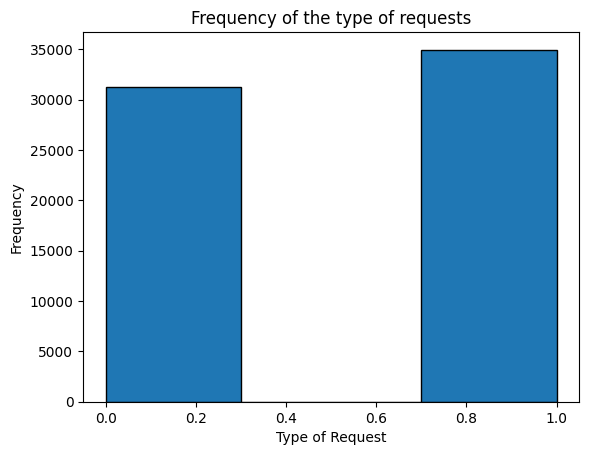

In [35]:
# Visualizing the dataframe as BENIGN and DDoS attack
plt.figure()

plt.hist(df_copy['Label'],bins=[0,0.3,0.7,1],edgecolor='black')
plt.xlabel('Type of Request')
plt.ylabel('Frequency')
plt.title('Frequency of the type of requests')

EDA: Exploratory Data Analysis

In [39]:
# Descriptive statistics
df_copy.describe()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
count,66236.000000,6.623600e+04,66236.000000,66236.000000,66236.000000,6.623600e+04,66236.000000,66236.000000,66236.000000,66236.000000,...,66236.000000,6.623600e+04,6.623600e+04,6.623600e+04,6.623600e+04,6.623600e+04,6.623600e+04,6.623600e+04,6.623600e+04,66236.000000
mean,6454.701794,1.388757e+07,5.180295,5.119225,695.632677,6.716764e+03,351.447068,23.466151,110.716876,135.440531,...,22.101455,1.585840e+05,2.020972e+04,1.949634e+05,1.470892e+05,8.153964e+06,2.602819e+06,9.997795e+06,6.297389e+06,0.527689
std,16711.002247,2.815859e+07,16.873784,23.797303,3230.070242,4.222729e+04,1435.520764,136.609404,400.379518,613.426001,...,4.844533,8.489147e+05,3.050515e+05,1.028144e+06,8.214214e+05,1.804617e+07,9.841559e+06,2.187645e+07,1.642701e+07,0.499237
min,0.000000,0.000000e+00,1.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
25%,80.000000,4.995450e+04,2.000000,1.000000,26.000000,0.000000e+00,6.000000,0.000000,6.000000,0.000000,...,20.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
50%,80.000000,9.949430e+05,3.000000,4.000000,30.000000,2.020000e+02,20.000000,0.000000,8.666667,0.000000,...,20.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000
75%,80.000000,7.640073e+06,5.000000,5.000000,64.000000,1.160100e+04,38.000000,6.000000,35.000000,10.263203,...,20.000000,1.005000e+03,0.000000e+00,1.005000e+03,1.005000e+03,7.410306e+06,0.000000e+00,7.415575e+06,6.526832e+06,1.000000
max,61538.000000,1.199983e+08,1681.000000,2942.000000,120783.000000,4.991419e+06,11680.000000,1472.000000,3867.000000,6692.644993,...,52.000000,1.000000e+08,3.950000e+07,1.000000e+08,1.000000e+08,1.200000e+08,6.530000e+07,1.200000e+08,1.200000e+08,1.000000


In [51]:
# Correlation between the features
df_copy.corr()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
Destination Port,1.000000,0.118247,-0.048431,-0.004564,0.383293,-0.059242,0.519745,0.166416,0.564814,0.506617,...,-0.026778,0.059145,-0.024220,0.035902,0.066249,0.158620,0.153946,0.179765,0.109393,-0.403214
Flow Duration,0.118247,1.000000,0.240031,0.176259,0.328653,0.101035,0.362416,-0.052816,0.315508,0.347470,...,-0.100068,0.371938,0.190683,0.415367,0.344144,0.824148,0.565444,0.860187,0.662530,-0.006747
Total Fwd Packets,-0.048431,0.240031,1.000000,0.957359,0.206399,0.933538,0.051960,-0.036706,0.018071,0.032401,...,-0.007965,0.139334,0.239639,0.235160,0.082717,0.109371,0.049768,0.106936,0.096819,-0.054044
Total Backward Packets,-0.004564,0.176259,0.957359,1.000000,0.191919,0.971283,0.067371,-0.008772,0.040387,0.047519,...,0.003753,0.100478,0.177676,0.166815,0.061167,0.068689,0.026489,0.065583,0.062414,-0.078762
Total Length of Fwd Packets,0.383293,0.328653,0.206399,0.191919,1.000000,0.082615,0.705302,0.008655,0.719168,0.680463,...,-0.007969,0.191537,0.163601,0.229453,0.156929,0.263047,0.231565,0.290858,0.189839,-0.217457
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Idle Mean,0.158620,0.824148,0.109371,0.068689,0.263047,0.039893,0.354290,-0.035096,0.331147,0.349786,...,-0.146526,0.512537,0.033182,0.432231,0.521332,1.000000,0.414837,0.957046,0.922670,0.084697
Idle Std,0.153946,0.565444,0.049768,0.026489,0.231565,0.017349,0.322788,-0.045227,0.308454,0.326573,...,-0.111997,-0.039428,-0.000877,-0.036467,-0.041464,0.414837,1.000000,0.660657,0.032122,0.085051
Idle Max,0.179765,0.860187,0.106936,0.065583,0.290858,0.038677,0.394960,-0.043362,0.371281,0.392423,...,-0.156701,0.410909,0.028558,0.346183,0.417071,0.957046,0.660657,1.000000,0.771378,0.096766
Idle Min,0.109393,0.662530,0.096819,0.062414,0.189839,0.035448,0.252209,-0.019231,0.233146,0.245814,...,-0.113882,0.579303,0.034749,0.488496,0.590259,0.922670,0.032122,0.771378,1.000000,0.058062


<Axes: >

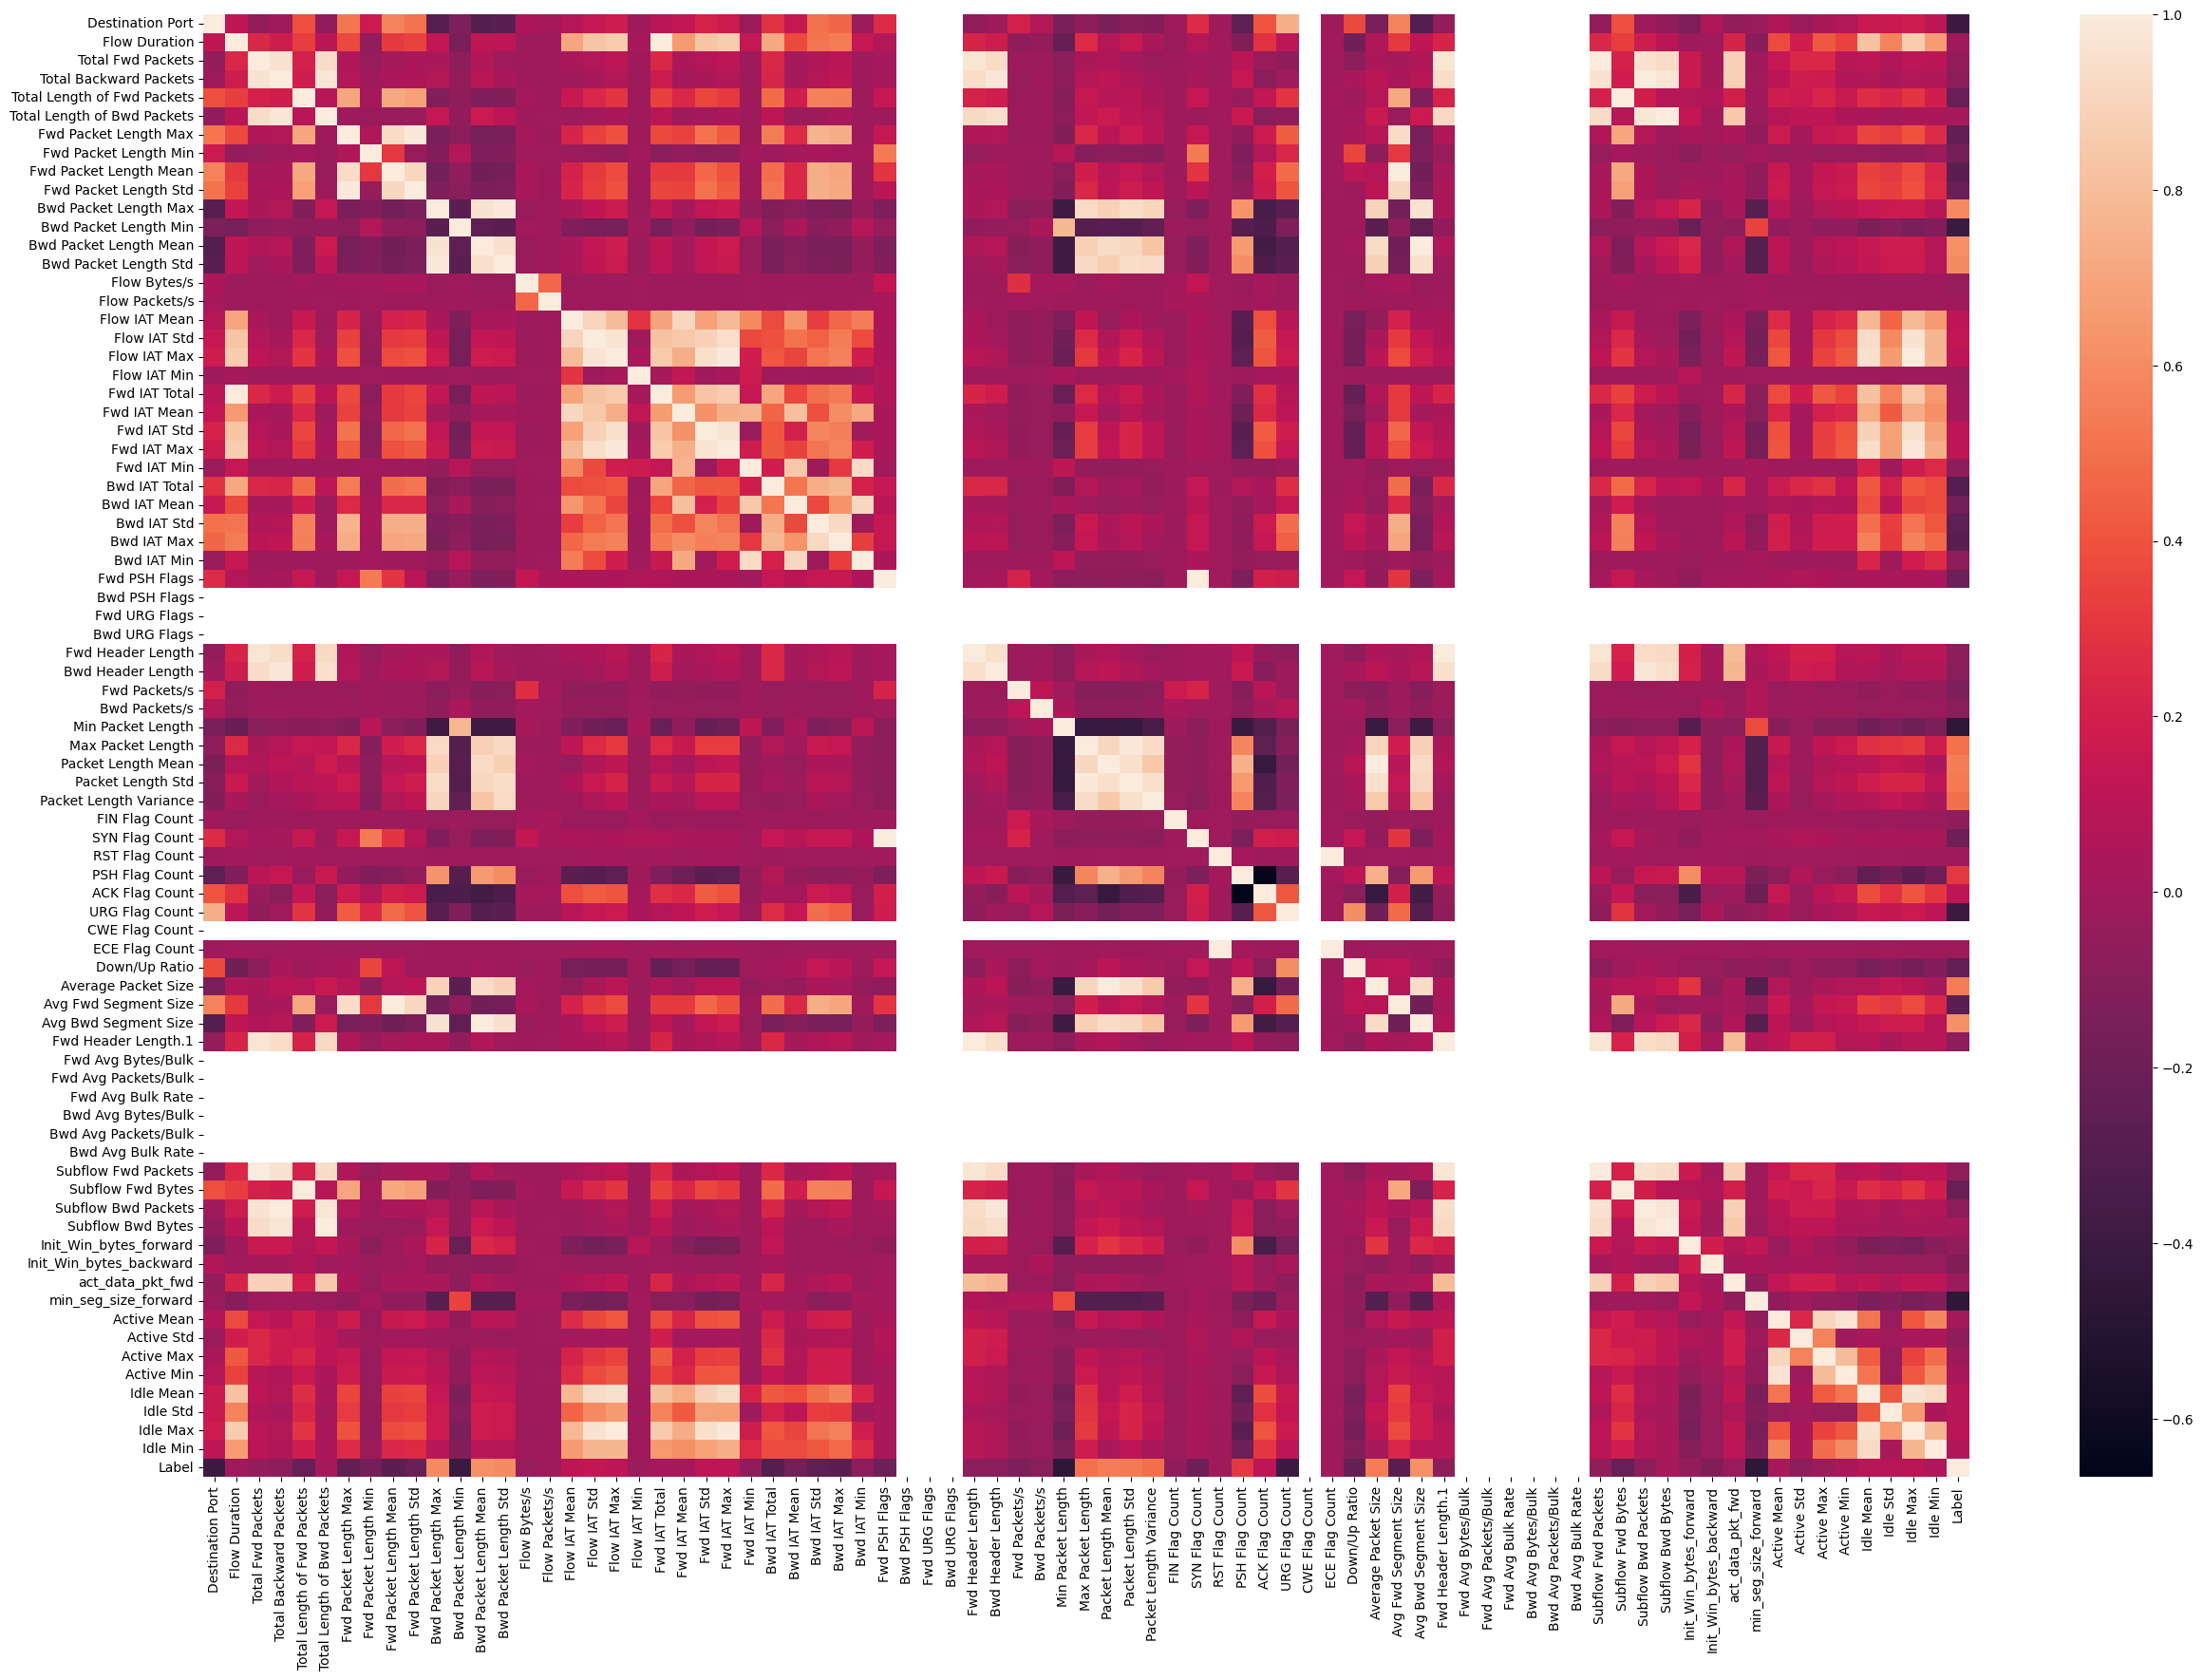

In [52]:
# Heatmap representation of the correlation 
plt.figure(figsize=(30,20))
sns.heatmap(df_copy.corr())

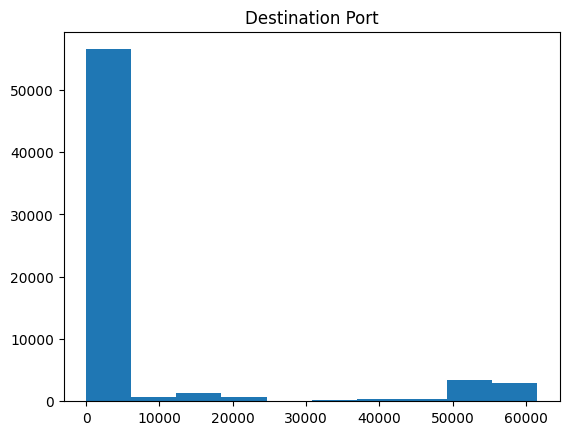

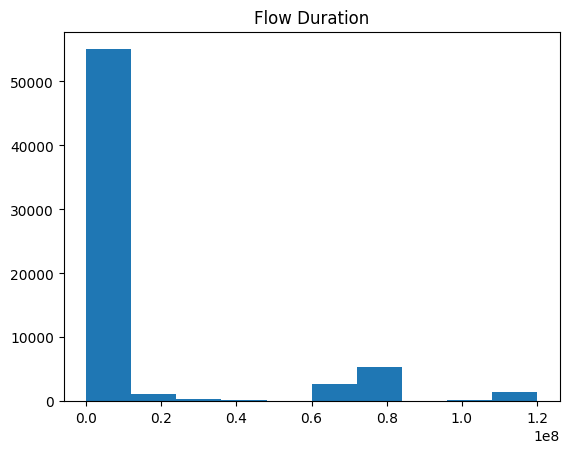

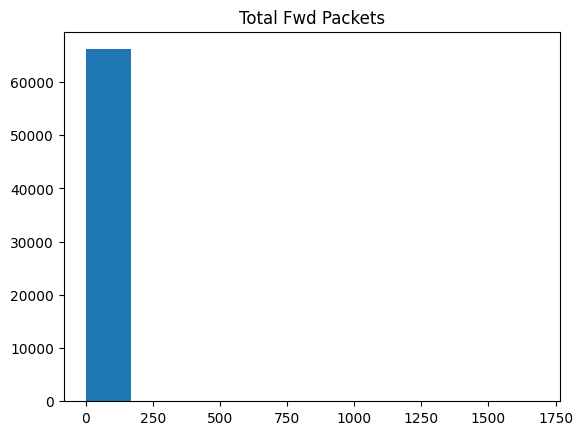

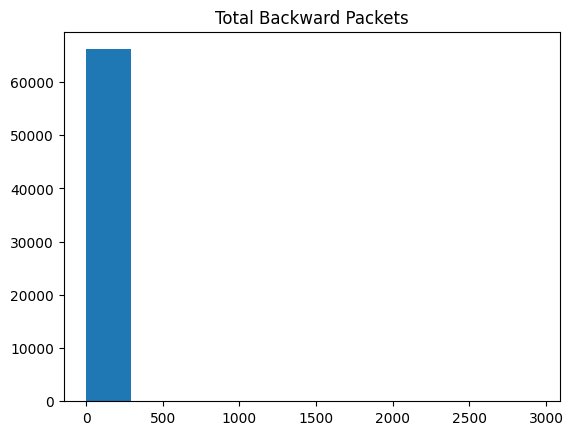

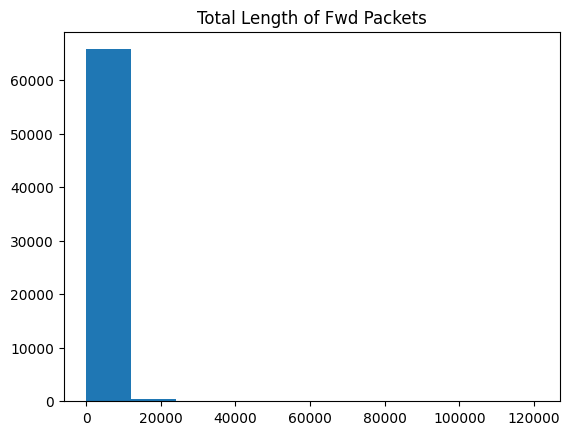

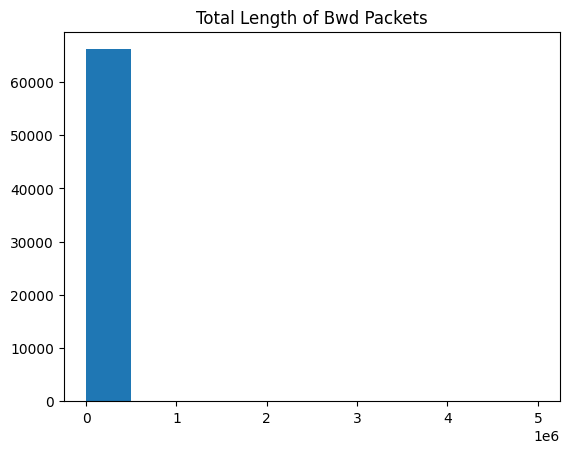

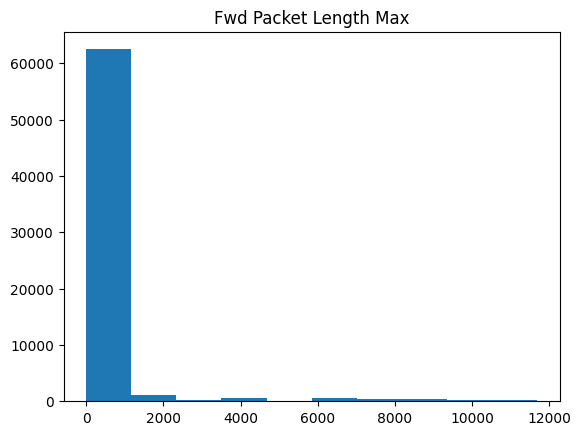

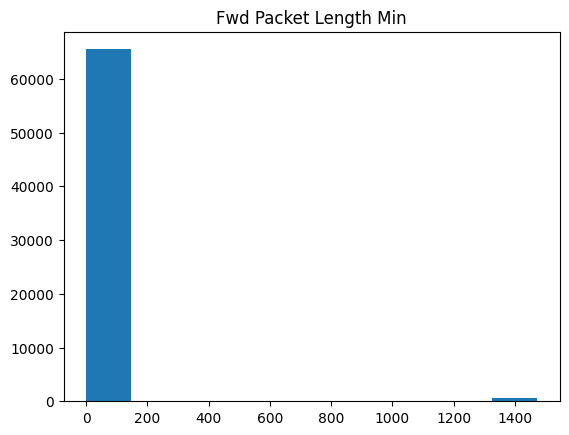

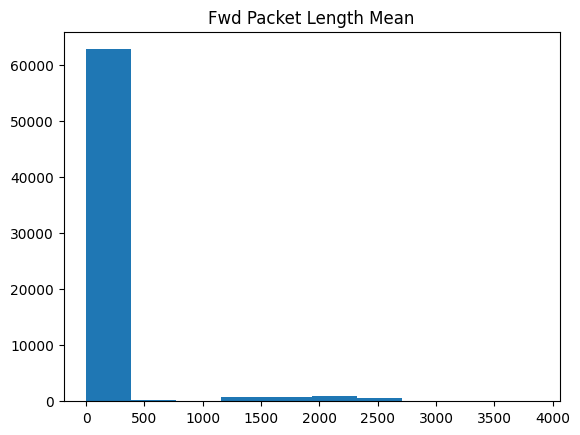

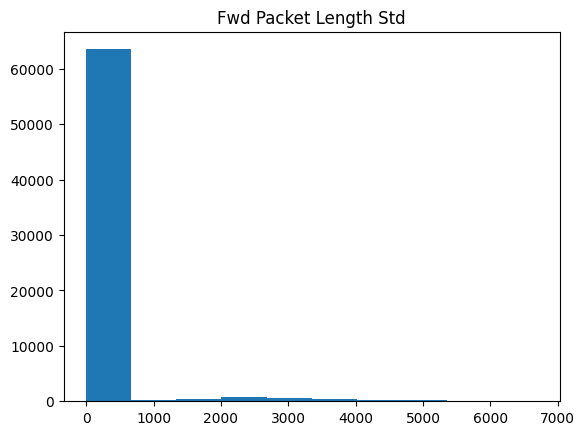

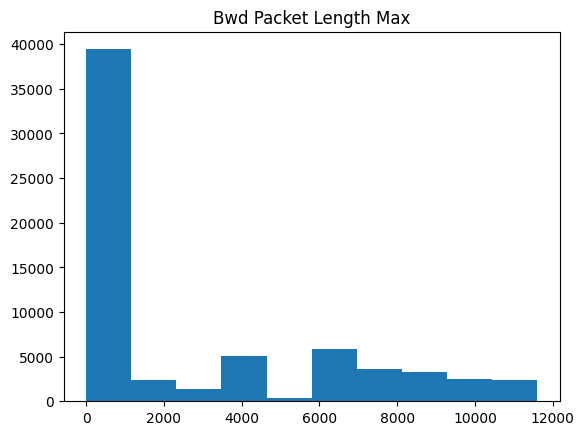

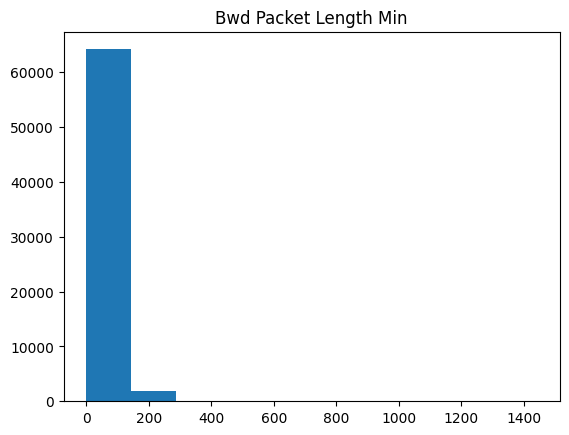

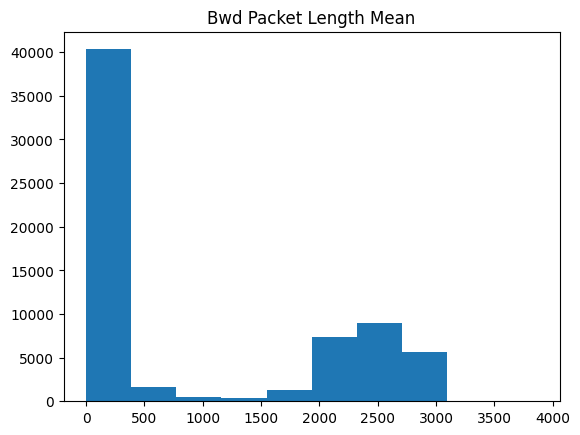

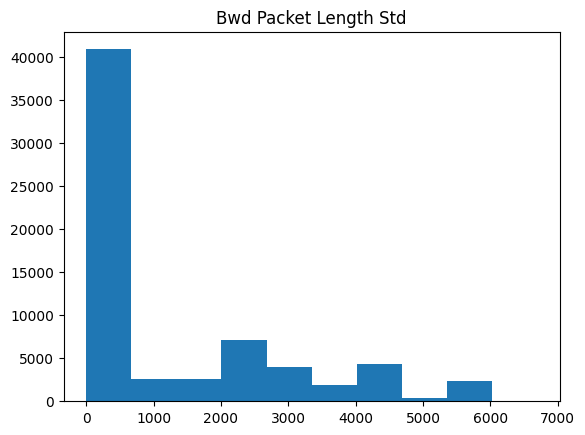

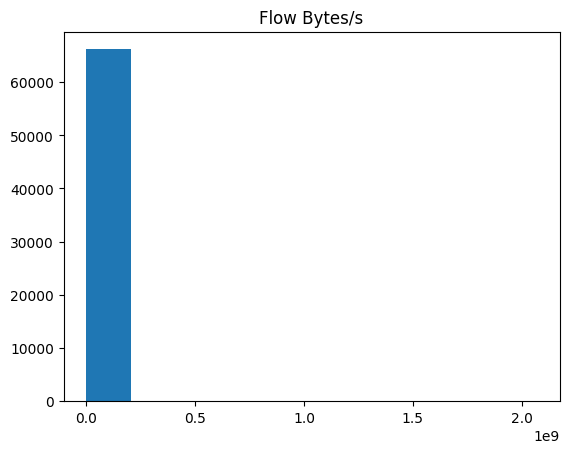

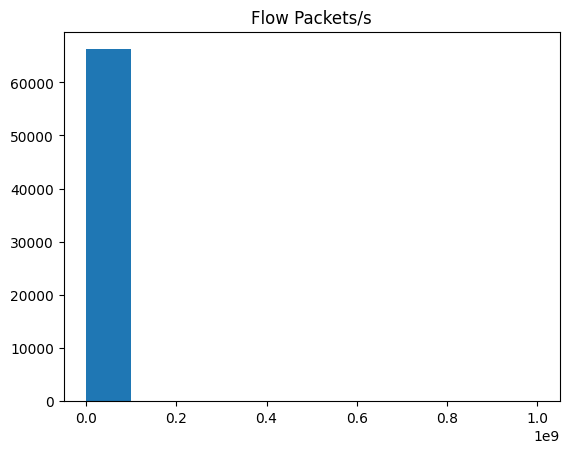

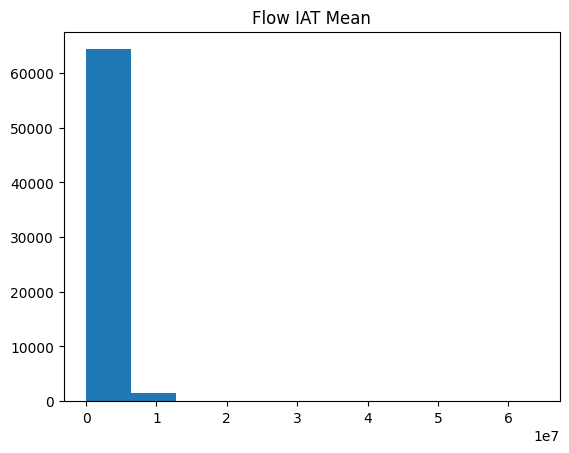

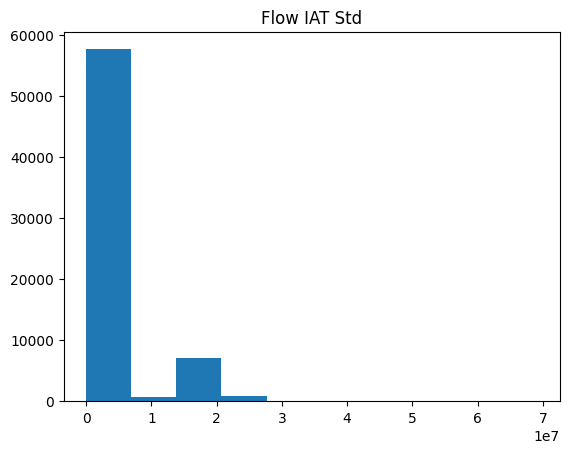

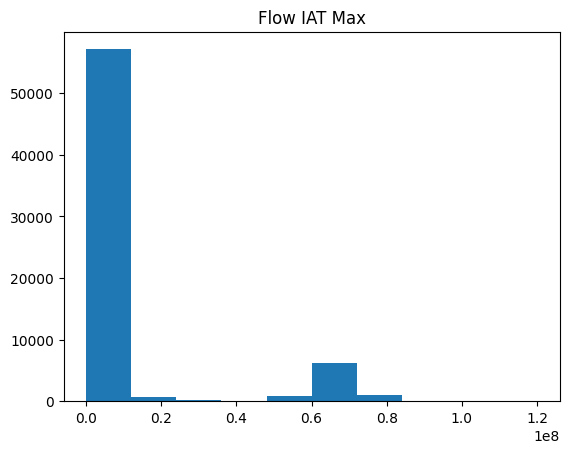

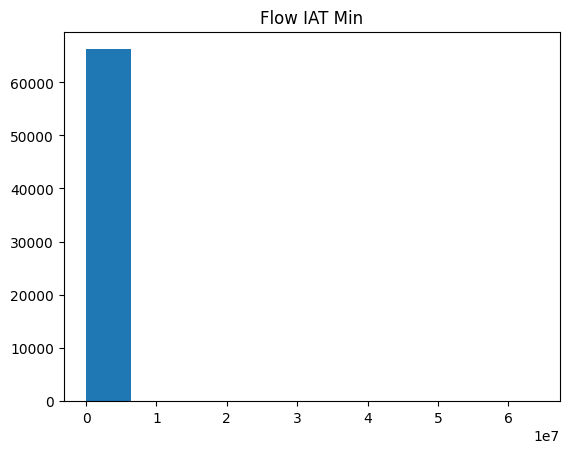

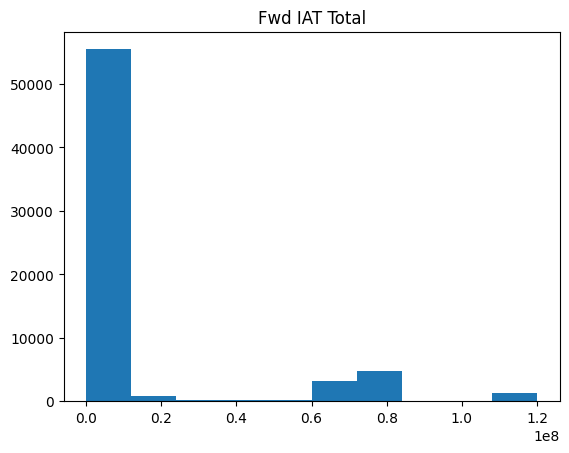

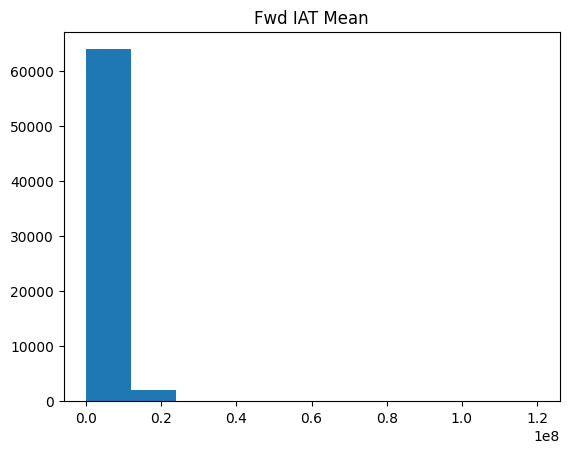

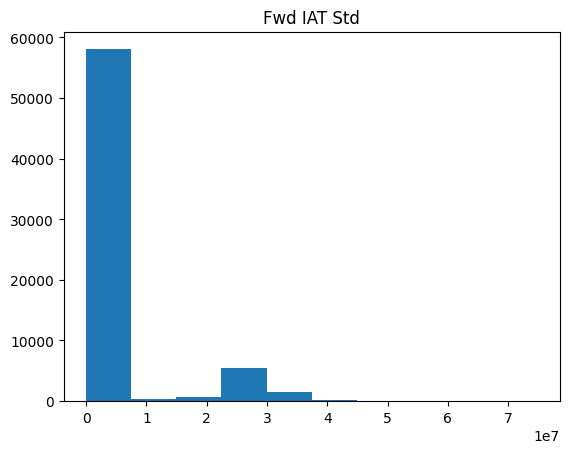

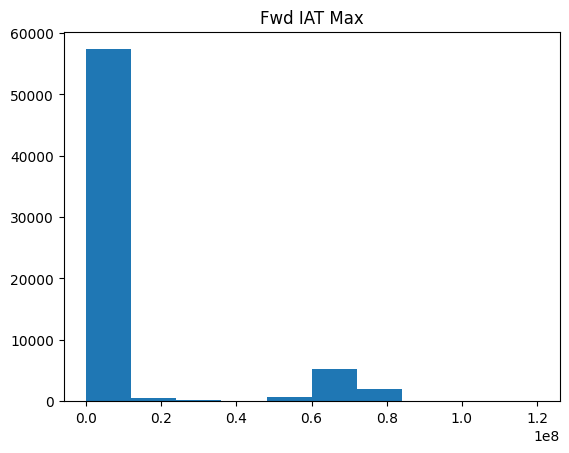

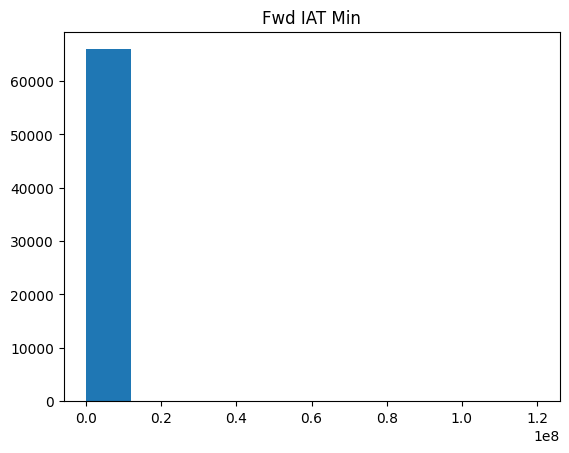

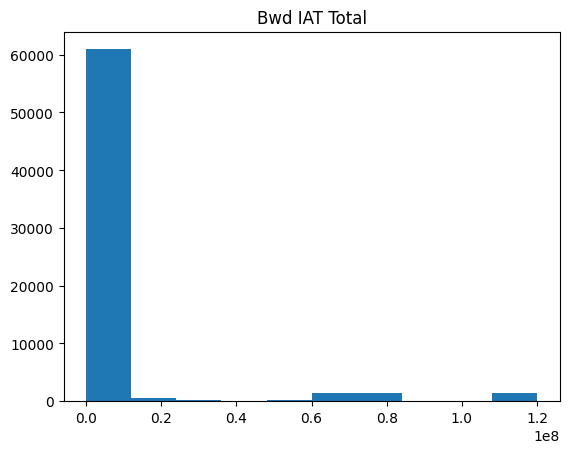

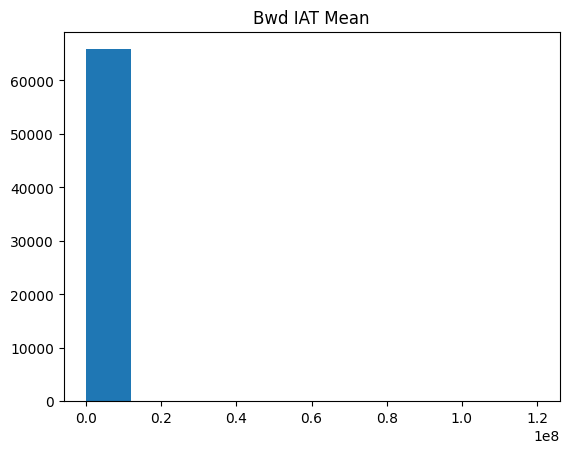

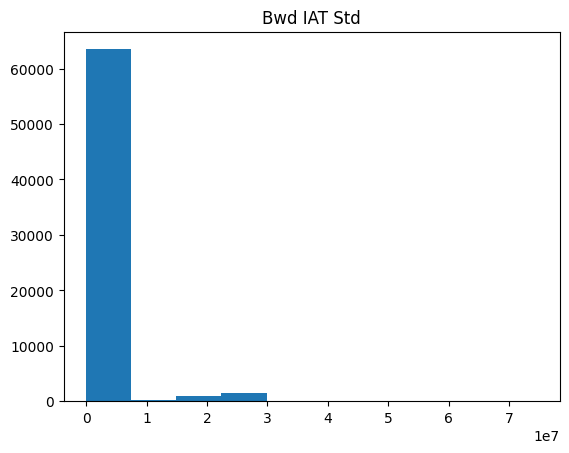

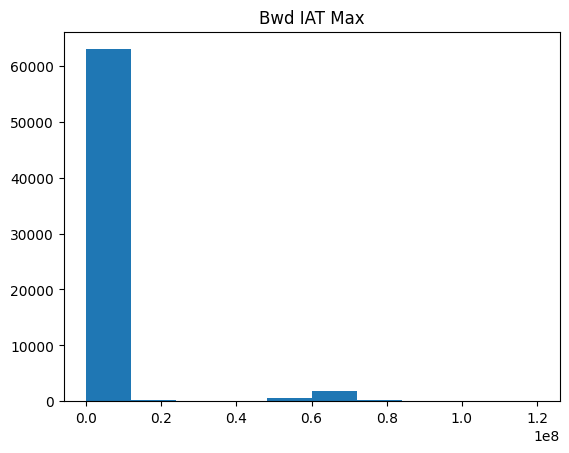

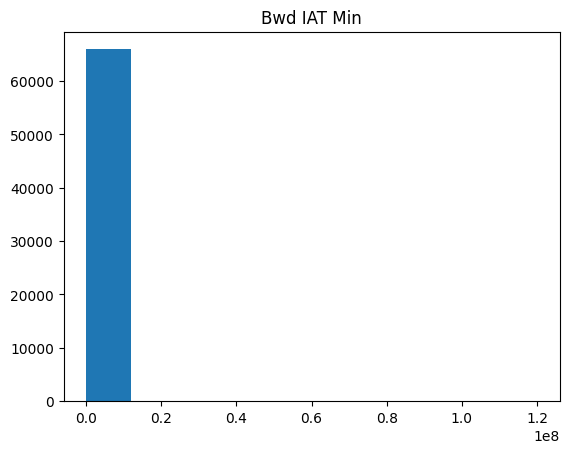

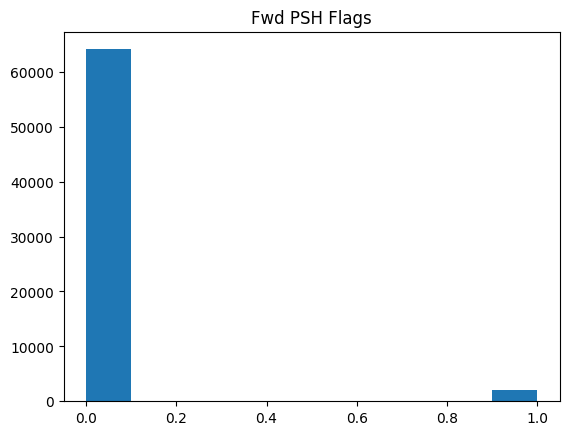

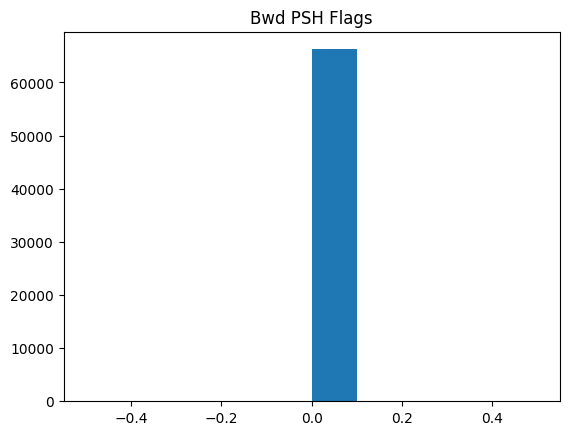

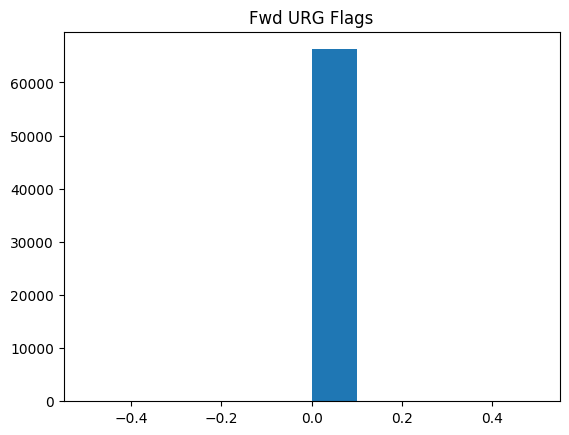

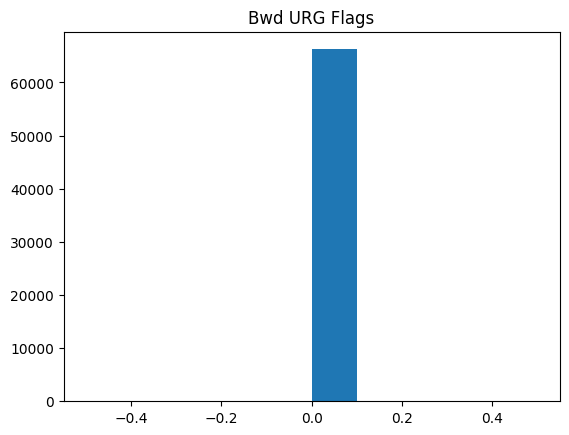

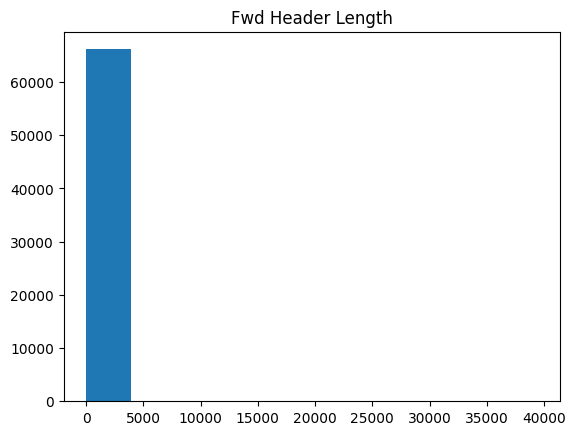

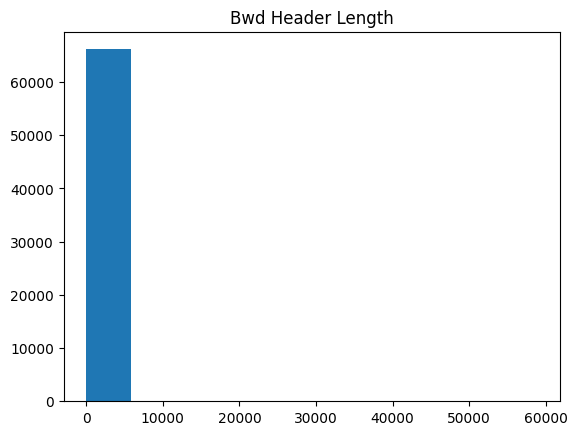

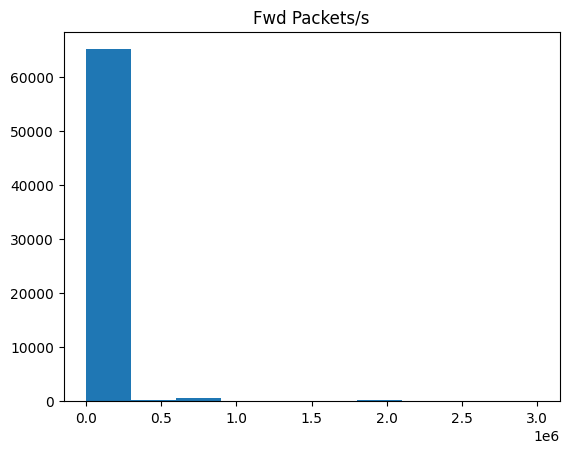

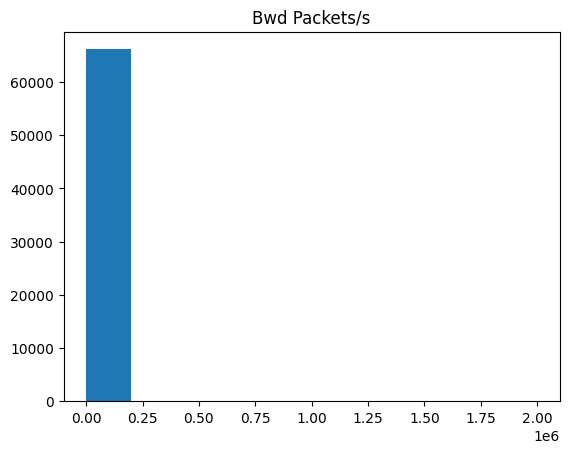

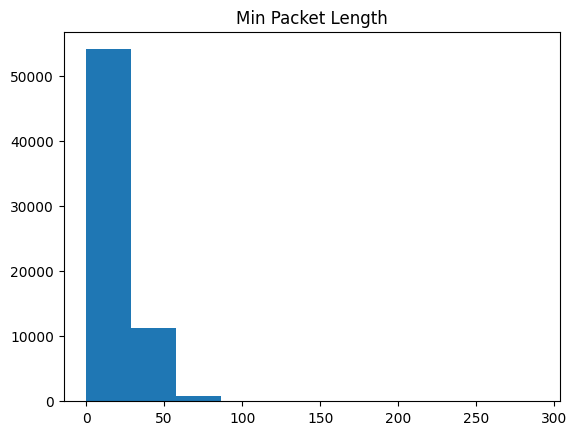

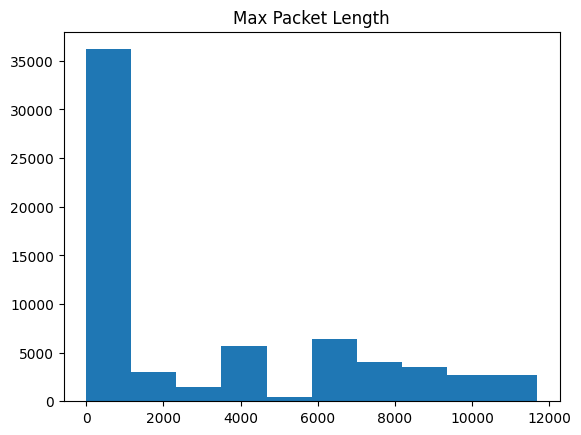

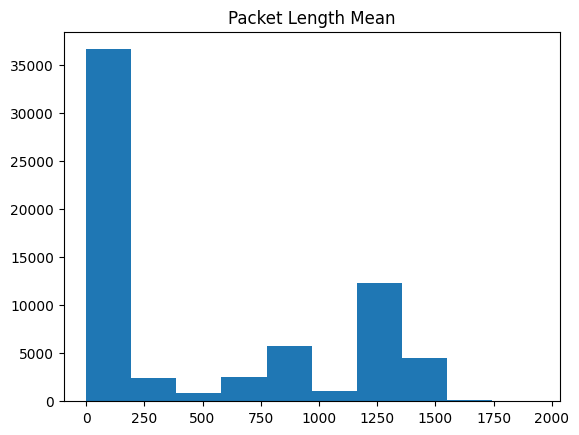

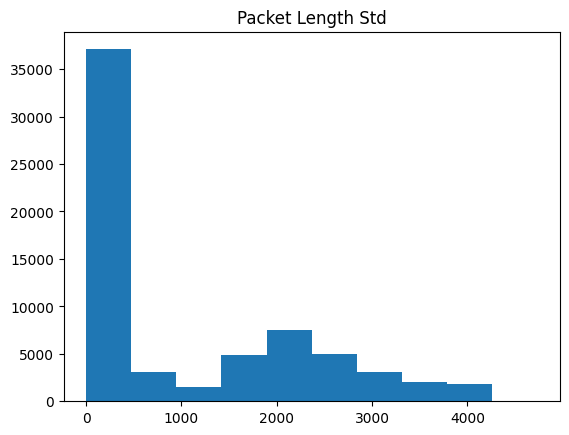

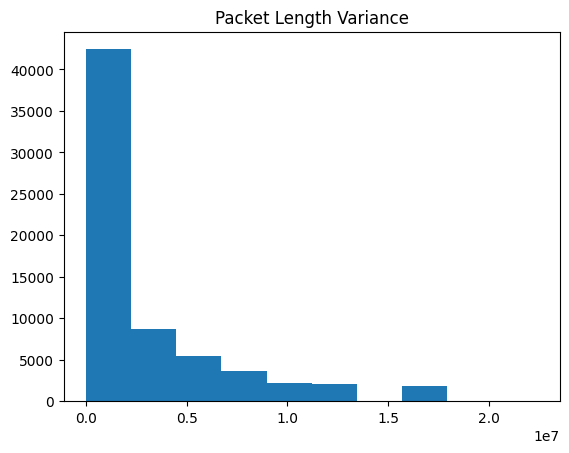

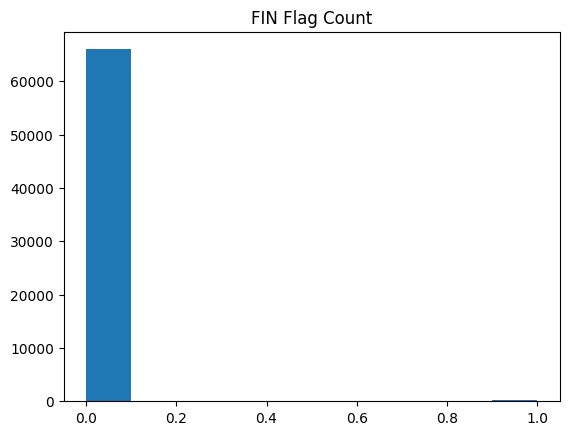

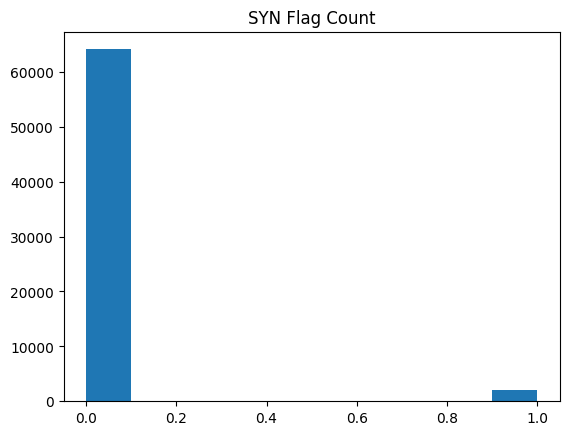

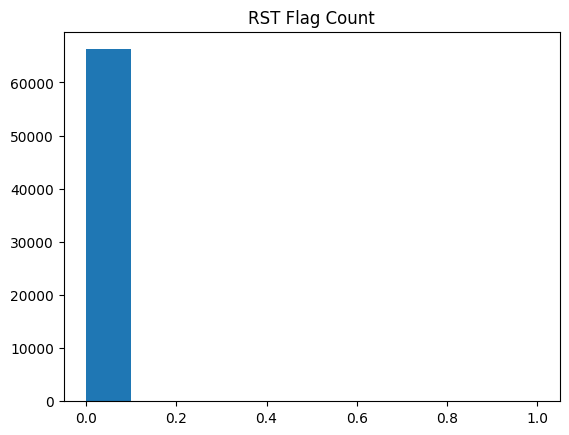

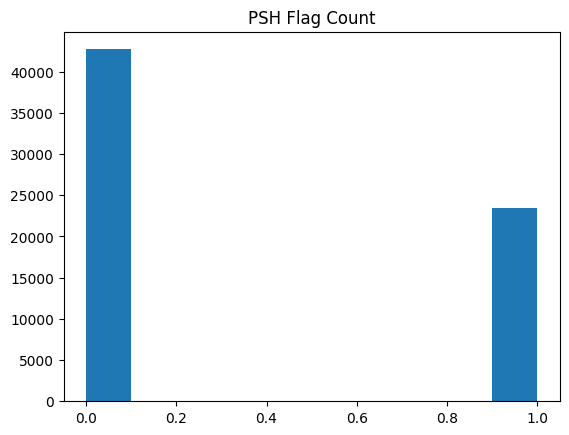

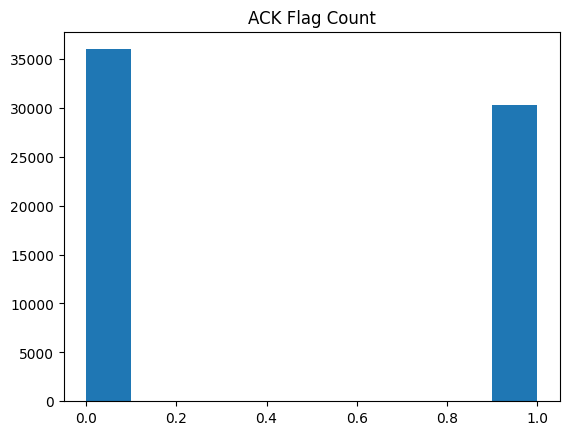

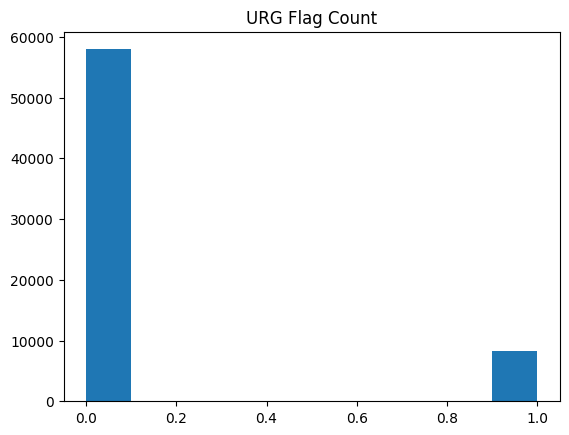

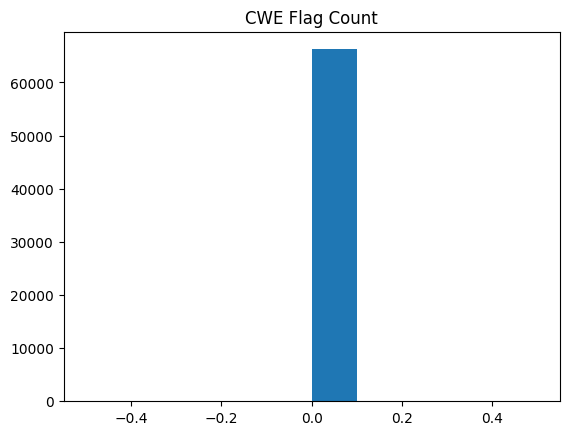

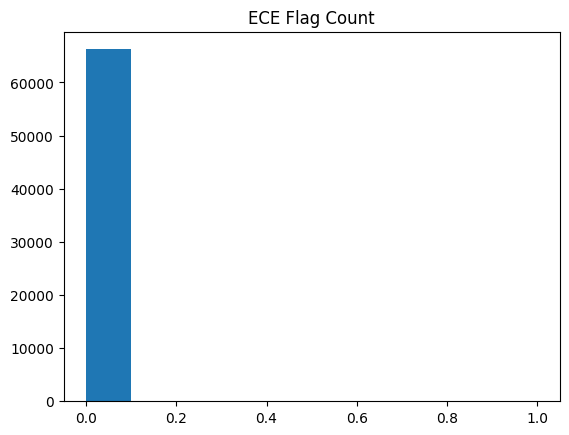

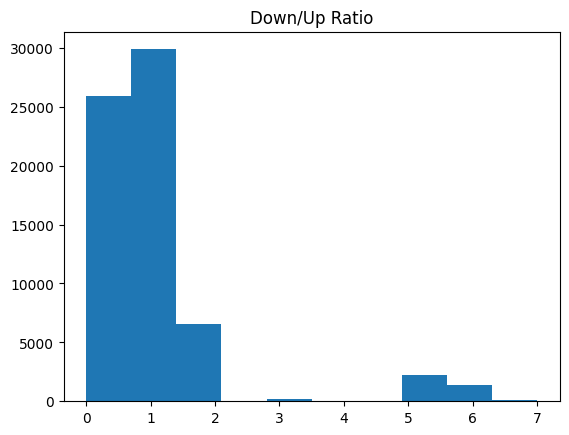

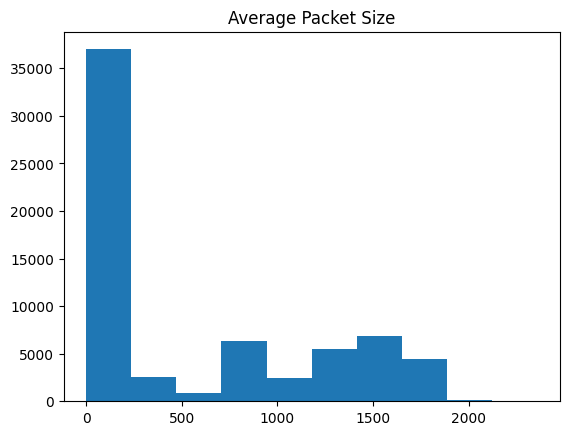

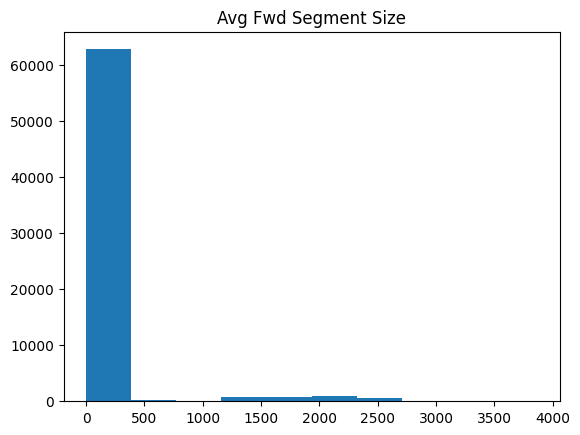

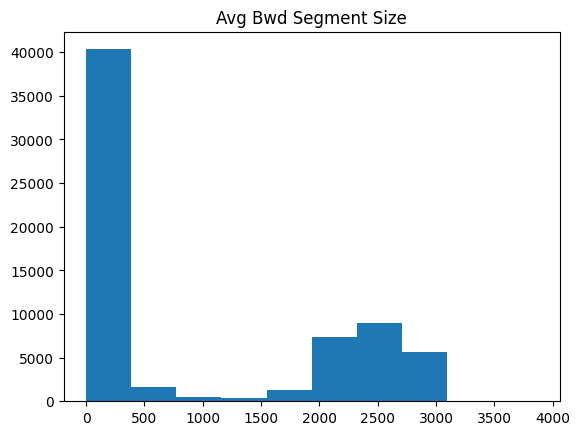

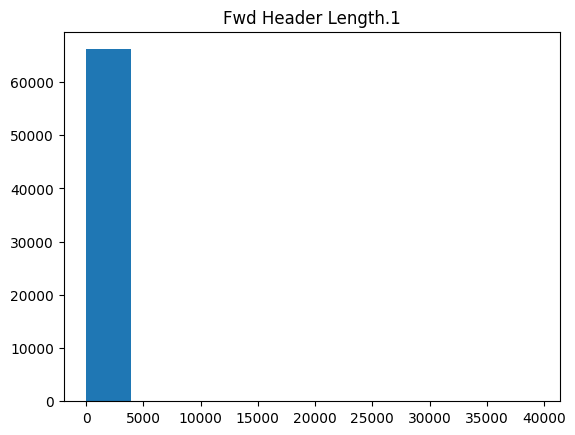

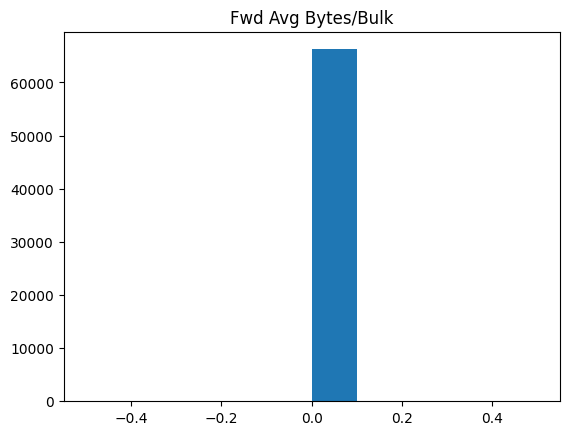

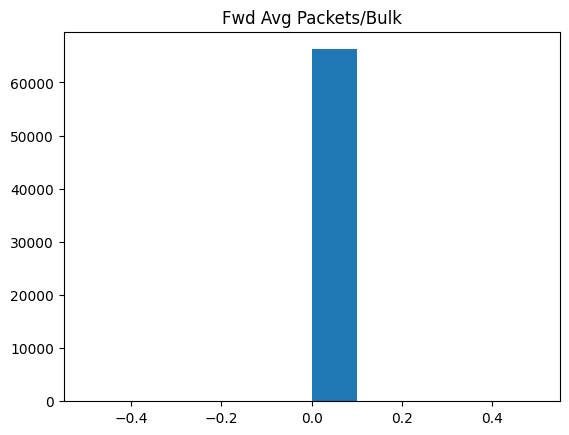

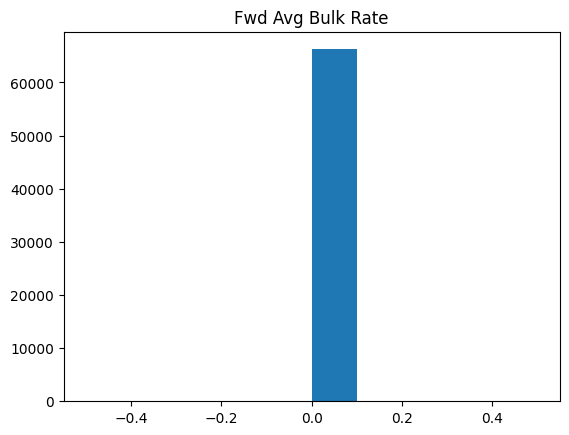

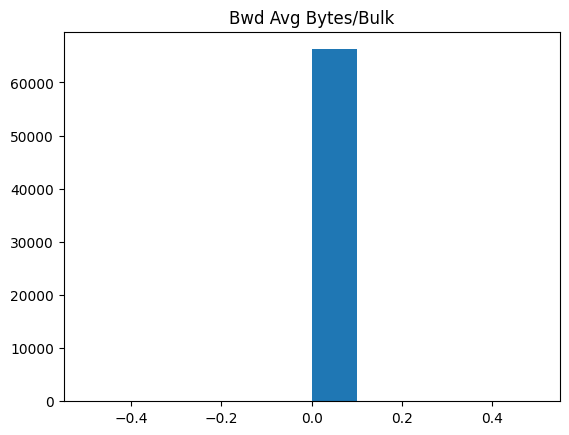

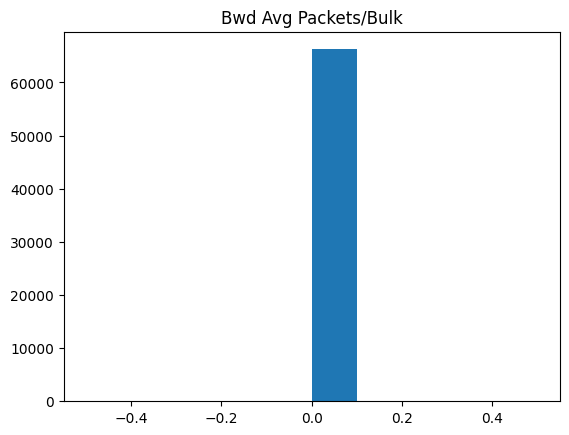

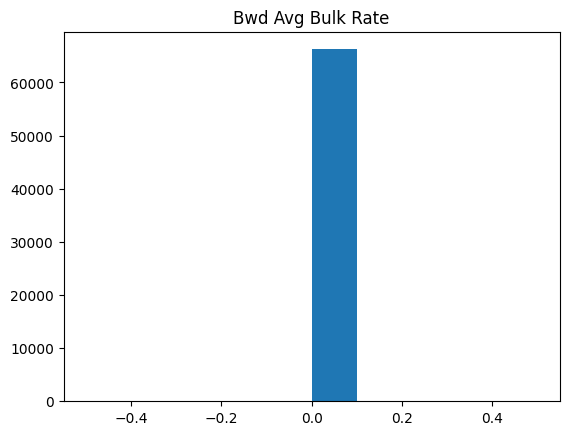

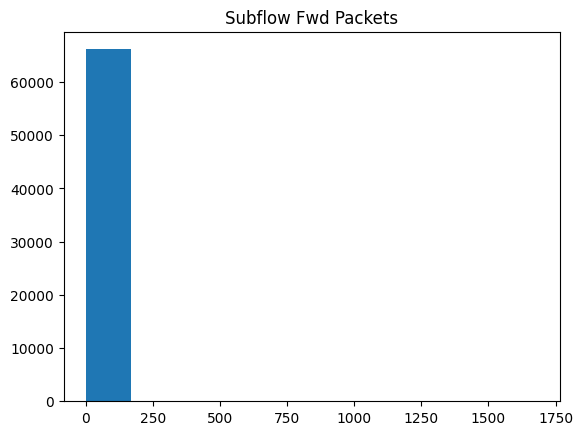

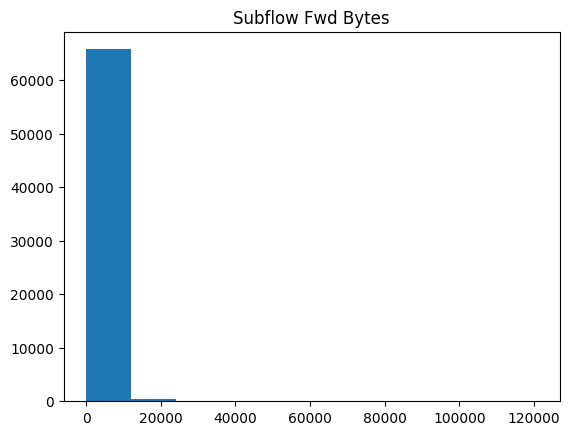

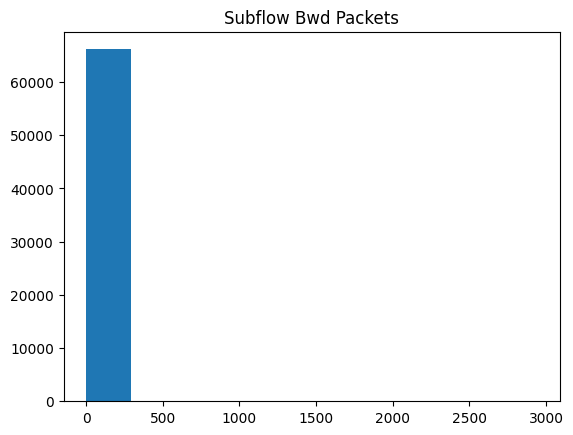

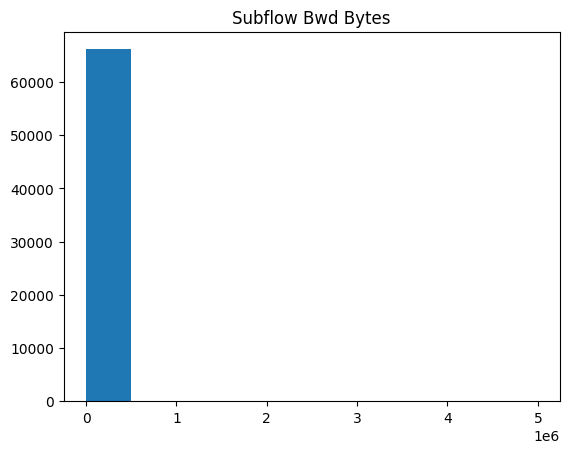

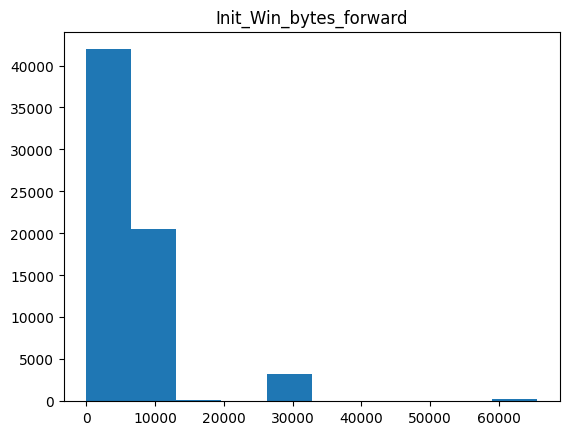

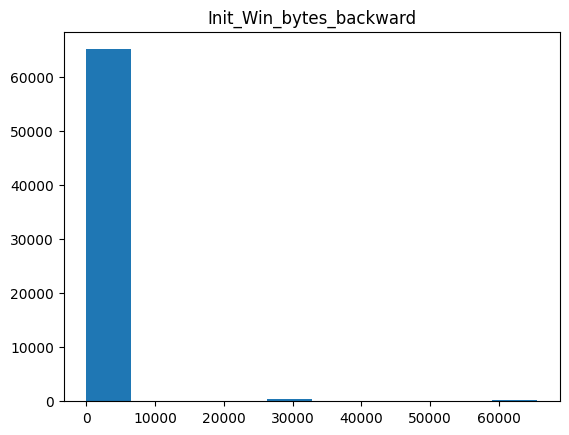

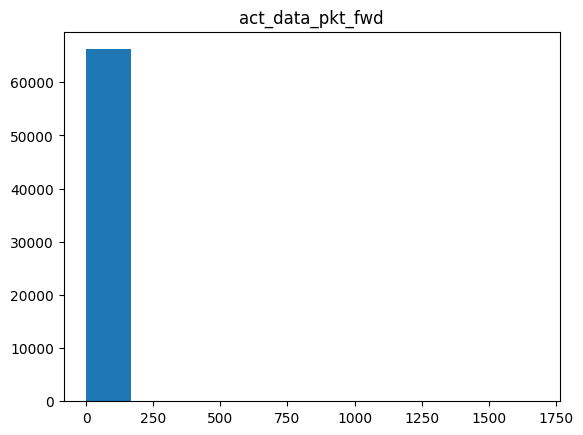

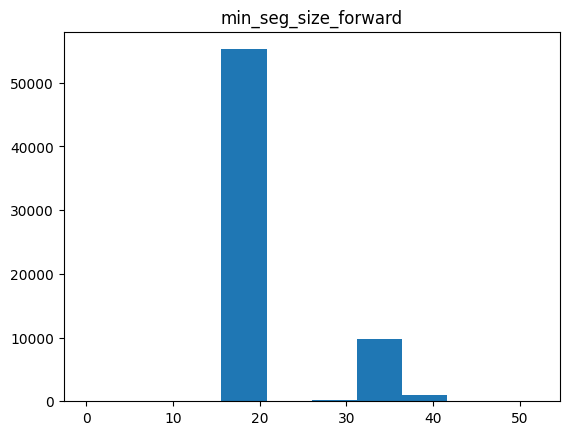

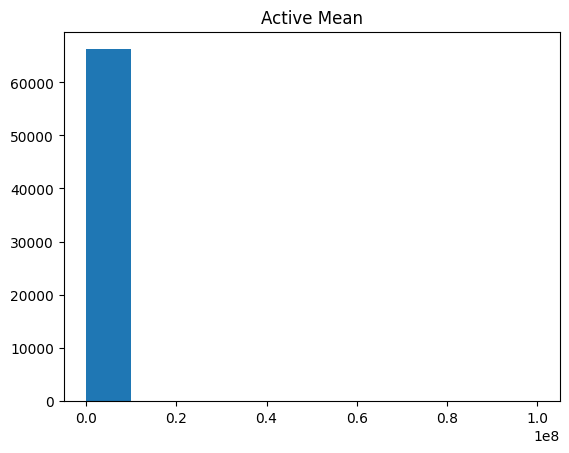

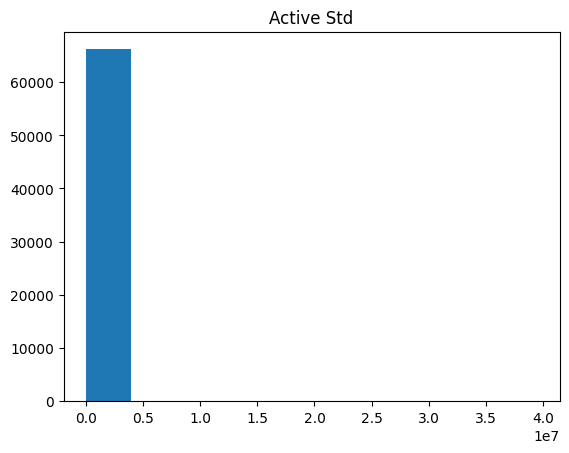

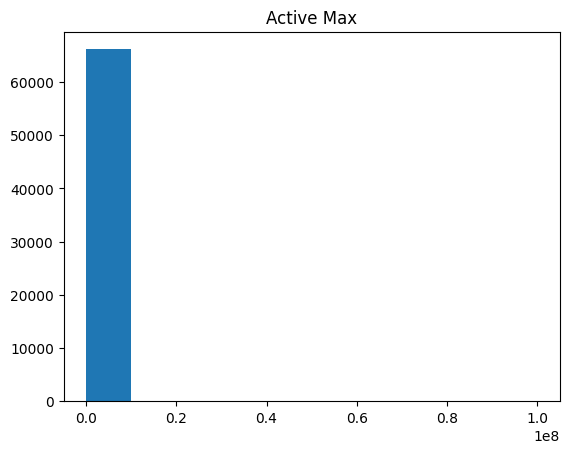

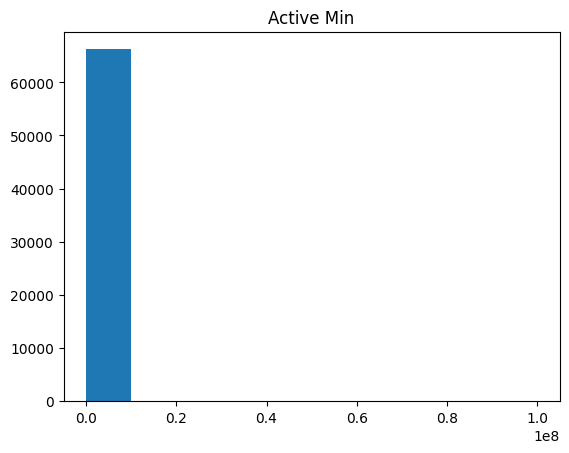

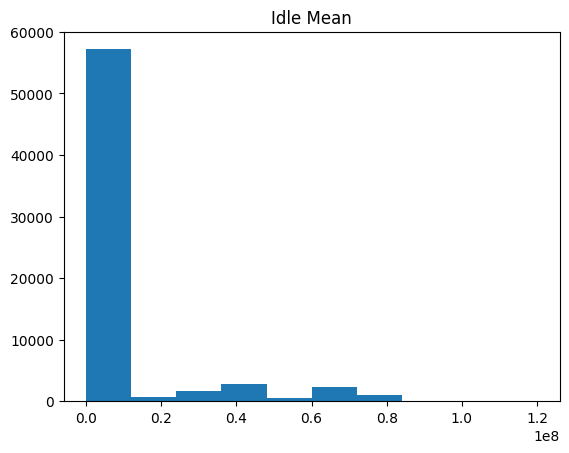

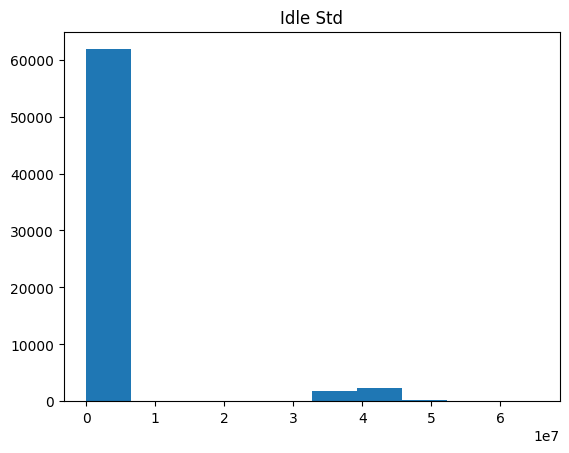

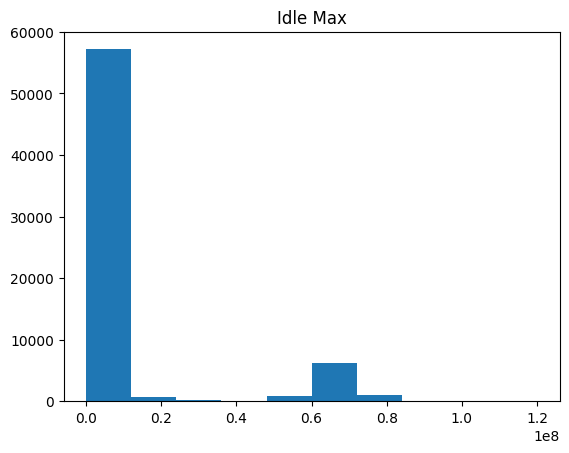

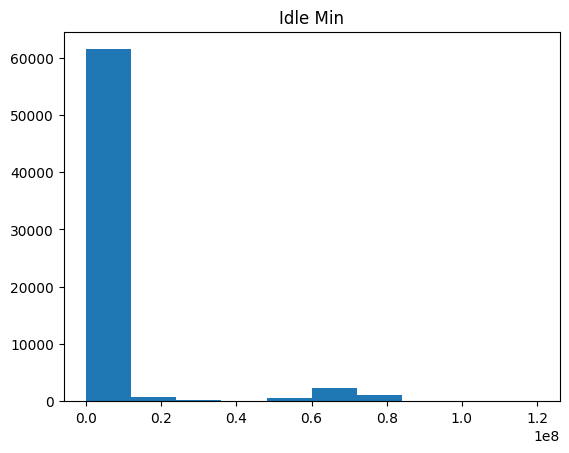

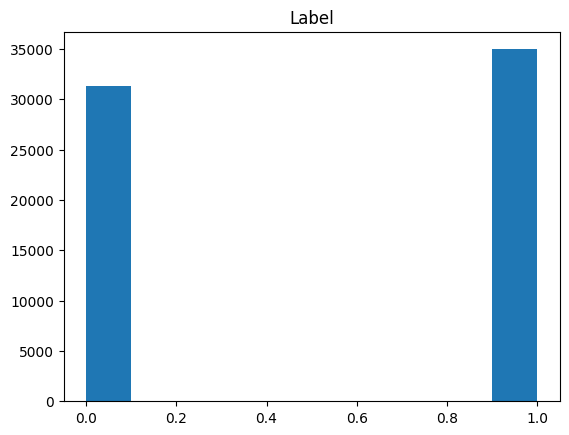

In [58]:
# Creating the histogram for each feature

for fea in df_copy.columns:
    plt.figure(5)
    plt.hist(df_copy[fea])
    plt.title(fea)
    plt.show()

Data Splitting- Train and Test

In [63]:
# Split into dependent and Independent feature

features=[fea for fea in df_copy.columns if fea != 'Label']
len(features)

78

In [69]:
x=pd.DataFrame()
for fea in features:
    x[fea]=df_copy[fea]

y=pd.DataFrame()
y=df_copy['Label']

In [71]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.30)

In [72]:

print("The train dataset size = ",x_train.shape)
print("The test dataset size = ",x_test.shape)

The train dataset size =  (46365, 78)
The test dataset size =  (19871, 78)


## Training the ML Model

### Random Forest

In [86]:
rf_model=RandomForestClassifier(n_estimators=50,random_state=42)
rf_model

RandomForestClassifier(n_estimators=50, random_state=42)

In [87]:
rf_model.fit(x_train,y_train)
y_pred=rf_model.predict(x_test)

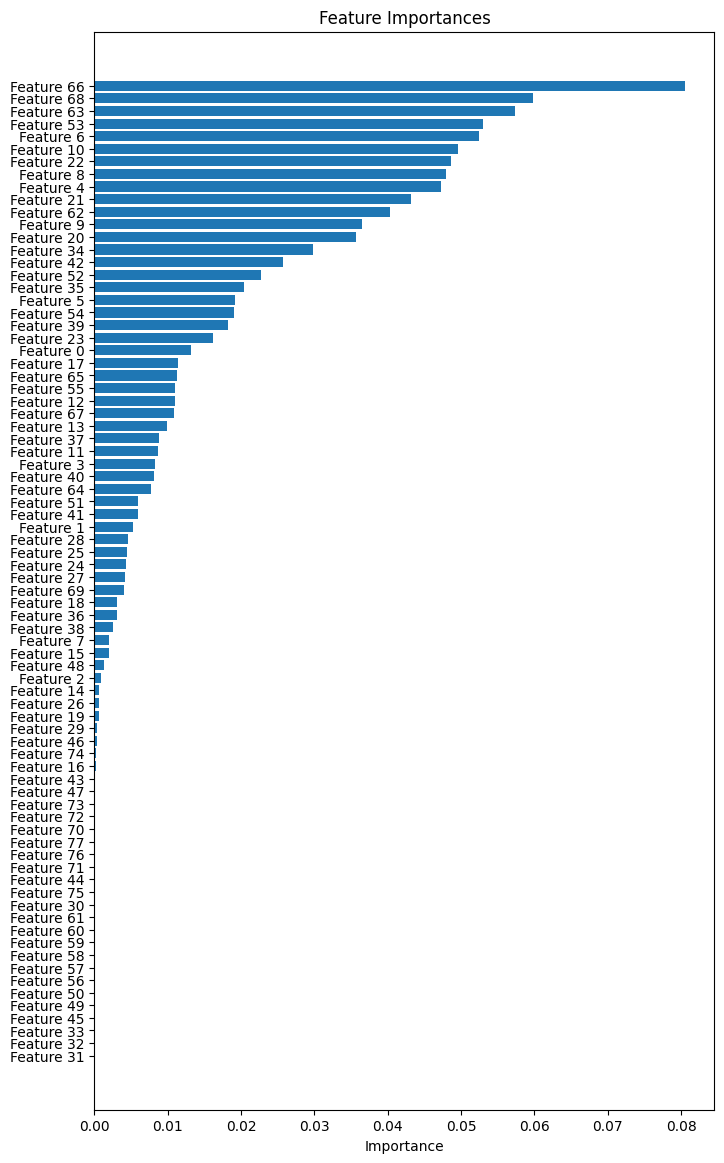

In [90]:
# Getting feature importances from the trained model
importances = rf_model.feature_importances_
# Getting the indices of features sorted by importance
indices=sorted(range(len(importances)),key=lambda i: importances[i],reverse=False)
feature_name=[f"Feature {i}" for i in indices]

plt.figure(figsize=(8, 14))
plt.barh(range(x_train.shape[1]), importances[indices], align="center")
plt.yticks(range(x_train.shape[1]), feature_name)
plt.xlabel("Importance")
plt.title("Feature Importances")
plt.show()